## Chatbot

In [1]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
import pandas as pd
import string
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential



In [2]:
import json

# Load the dataset from a JSON file
with open('dataset2.json') as f:
    data = json.load(f)


stop_words = set()

with open('stopword_id.txt', 'r', encoding='utf-8') as file:
    for line in file:
        stop_words.add(line.strip())


tags = []
inputs = []
responses = {}
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

for intent in data['intents']:
    responses[intent['tag']] = intent['responses']
    for line in intent['patterns']:
        # Tokenize each word in the pattern
        w = nltk.word_tokenize(line)
        w = [lemmatizer.lemmatize(stemmer.stem(word.lower())) for word in w if word not in stop_words]
        inputs.append(' '.join(w))
        tags.append(intent['tag'])

# Create a DataFrame
data_df = pd.DataFrame({"inputs": inputs, "tags": tags})


In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Tokenizer
tokenizer = Tokenizer(num_words=2000, oov_token='<OOV>')
tokenizer.fit_on_texts(data_df['inputs'])

# Encode the outputs
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(data_df['tags'])

# Define input shape
input_shape = 100  # Misalkan panjang maksimum input adalah 100 kata

# Padding sequences
sequences = tokenizer.texts_to_sequences(data_df['inputs'])
x_train = pad_sequences(sequences, maxlen=input_shape, truncating='post')

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [4]:
model = Sequential([
    tf.keras.layers.Embedding(len(tokenizer.word_index)+1, 64, input_length=100),
    tf.keras.layers.LSTM(10, return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(y_train), activation='softmax'),
])
# compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
history = model.fit(x_train, y_train, epochs=200)

Epoch 1/200
7/7 [==============================] - 2s 27ms/step - loss: 5.2271 - accuracy: 0.0000e+00
Epoch 2/200
7/7 [==============================] - 0s 26ms/step - loss: 4.6347 - accuracy: 0.0245
Epoch 3/200
7/7 [==============================] - 0s 26ms/step - loss: 4.2021 - accuracy: 0.0147
Epoch 4/200
7/7 [==============================] - 0s 28ms/step - loss: 4.1383 - accuracy: 0.0392
Epoch 5/200
7/7 [==============================] - 0s 26ms/step - loss: 4.1219 - accuracy: 0.0392
Epoch 6/200
7/7 [==============================] - 0s 27ms/step - loss: 4.1031 - accuracy: 0.0196
Epoch 7/200
7/7 [==============================] - 0s 26ms/step - loss: 4.1003 - accuracy: 0.0196
Epoch 8/200
7/7 [==============================] - 0s 29ms/step - loss: 4.0841 - accuracy: 0.0490
Epoch 9/200
7/7 [==============================] - 0s 29ms/step - loss: 4.0815 - accuracy: 0.0294
Epoch 10/200
7/7 [==============================] - 0s 29ms/step - loss: 4.0674 - accuracy: 0.0392
Epoch 11/200
7/

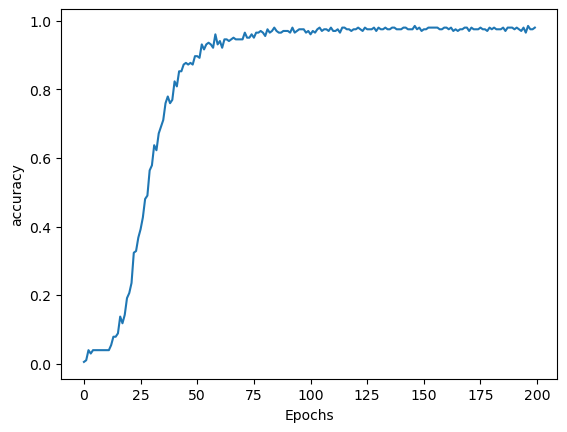

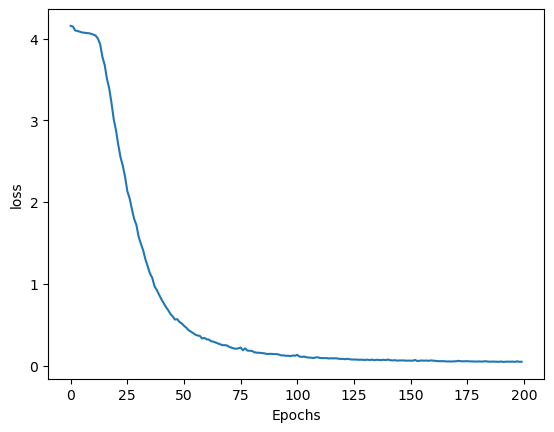

In [7]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [9]:
try:
    user_input = input('Masukkan pertanyaan: ')
    user_input = ''.join([letters.lower() for letters in user_input if letters not in string.punctuation])
    texts_p = [user_input]
    
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = pad_sequences(prediction_input, maxlen=input_shape)
    
    predicted_output = model.predict(prediction_input)
    predicted_label_index = np.argmax(predicted_output)
    predicted_label = label_encoder.inverse_transform([predicted_label_index])[0]
    
    print('Chatbot:', predicted_label)
except:
    print("Chatbot: Maaf, saya tidak memahami maksud Anda.")

1/1 [==============================] - 0s 18ms/step
Chatbot: PMS (Sindrom Pra-Menstruasi)


In [34]:
import random

while True:
    user_input = input('You: ')
    if user_input.lower() == 'goodbye':
        print("Chatbot: Goodbye!")
        break
    try:
        input_seq = tokenizer.texts_to_sequences([user_input])
        input_seq = pad_sequences(input_seq, maxlen=input_shape)
        predicted_label_seq = model.predict(input_seq)
        predicted_label = label_encoder.inverse_transform([predicted_label_seq.argmax(axis=-1)])[0]
        print("tags:", predicted_label)

        # Pilih respons dari kategori tag
        responses_for_tag = responses.get(predicted_label, ["I'm sorry, I don't understand that."])
        response = random.choice(responses_for_tag)
        
        print("Chatbot:", response)
    except:
        print("Chatbot: Maaf, saya tidak memahami maksud Anda.")


1/1 [==============================] - 1s 535ms/step


c:\Users\nurul\anaconda3\envs\cnn\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tags: PMS (Sindrom Pra-Menstruasi)
Chatbot: PMS dapat mempengaruhi kesehatan mental. Beberapa gejala PMS yang dapat mempengaruhi kesehatan mental meliputi perubahan suasana hati, kecemasan, dan depresi. Jika Anda mengalami gejala PMS yang mempengaruhi kesehatan mental Anda, sebaiknya berkonsultasi dengan dokter.
1/1 [==============================] - 0s 19ms/step


c:\Users\nurul\anaconda3\envs\cnn\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tags: menopause
Chatbot: Menopause adalah kondisi di mana ovarium berhenti memproduksi hormon reproduksi dan menstruasi tidak terjadi selama 12 bulan berturut-turut[^1^][1]. Gejala umum dari menopause meliputi haid yang tidak teratur, hot flashes, insomnia, dan perubahan suasana hati[^1^][1].
1/1 [==============================] - 0s 28ms/step


c:\Users\nurul\anaconda3\envs\cnn\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tags: Kram Perut
Chatbot: Kram perut saat menstruasi dapat disebabkan oleh berbagai faktor, seperti ketidakseimbangan hormon, infeksi, atau kondisi medis tertentu. Jika Anda mengalami kram perut yang tidak normal, sebaiknya berkonsultasi dengan dokter.
1/1 [==============================] - 0s 18ms/step


c:\Users\nurul\anaconda3\envs\cnn\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tags: PMS (Sindrom Pra-Menstruasi)
Chatbot: Jika gejala PMS Anda parah dan mengganggu aktivitas sehari-hari Anda, sebaiknya berkonsultasi dengan dokter. Dokter dapat membantu menentukan penyebab gejala PMS Anda dan meresepkan pengobatan yang sesuai.


In [8]:
def predict_answer(model, tokenizer, label_encoder, question):
    question = ''.join([letters.lower() for letters in question if letters not in string.punctuation])
    texts_p = [question]
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input], input_shape)
    output = model.predict(prediction_input)
    output = output.argmax()
    response_tag = label_encoder.inverse_transform([output])[0]
    return response_tag

In [9]:
import random
while True:
    
    user_input = input('You: ')
    if user_input.lower() == 'goodbye':
        print("Chatbot: Goodbye!")
        break

    # Use your predict_answer function to get the response
    response_tag = predict_answer(model, tokenizer, label_encoder, user_input)

    print("Chatbot:", random.choice(responses.get(response_tag, ["I'm sorry, I don't understand that."])))

1/1 [==============================] - 0s 325ms/step
Chatbot: Menstruasi adalah proses alami yang terjadi pada wanita setiap bulan. Selama menstruasi, tubuh melepaskan lapisan rahim yang tidak diperlukan melalui vagina.
1/1 [==============================] - 0s 17ms/step
Chatbot: Menstruasi adalah proses alami yang terjadi pada wanita setiap bulan. Selama menstruasi, tubuh melepaskan lapisan rahim yang tidak diperlukan melalui vagina.
1/1 [==============================] - 0s 16ms/step
Chatbot: Menstrual cup adalah alat penampung darah menstruasi yang dapat digunakan berulang kali. Berikut adalah panduan penggunaan menstrual cup: 

1. Cuci tangan dengan sabun dan air mengalir. 
2. Oleskan air atau pelumas berbahan dasar air ke tepi gelas. 
3. Lipat dengan kuat cangkir menstruasi menjadi dua, pegang di satu tangan dengan tepi menghadap ke atas. 
4. Masukkan cangkir, pelek ke atas, ke dalam vagina seperti Anda akan memasukkan tampon tanpa aplikator. 
5. Setelah cangkir berada di dalam va